In [51]:
# Add these two lines at the very top of your script/cell
import os
os.environ['SCIPY_ARRAY_API'] = '1'

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Final_Augmented_dataset_Diseases_and_Symptoms.csv')

In [54]:
df.shape

(246945, 378)

In [55]:
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df['diseases'].value_counts()

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64

In [57]:
len(df['diseases'].unique())

773

There are 773 unique values

In [58]:
## Check Null Values
null_counts = df.isnull().sum()
null_counts[null_counts > 0].index
 
# There is no NULL values in the entire dataset

Index([], dtype='object')

### Check if the dataset is imbalance

C:\TEMP\ipykernel_22348\3135586232.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


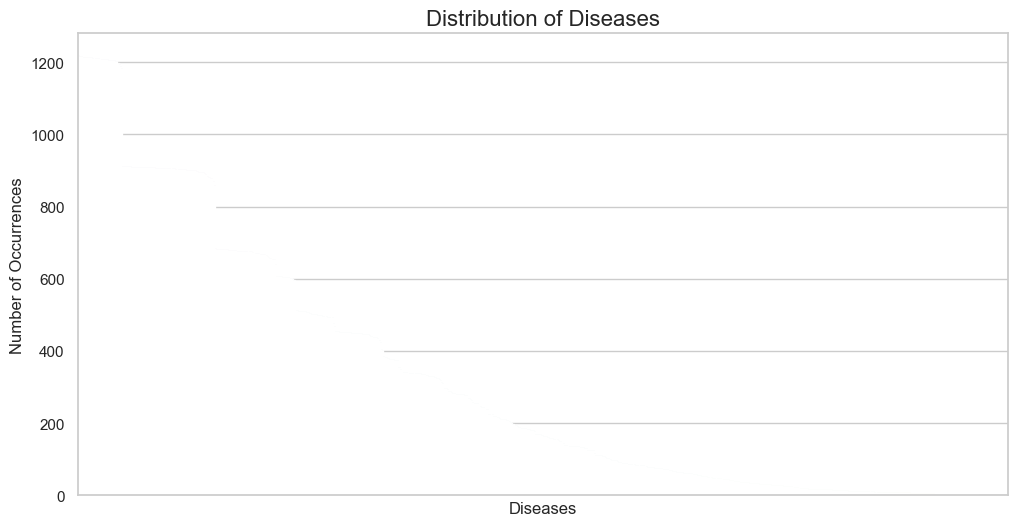

In [59]:
# Set a professional style for the plot
sns.set(style="whitegrid")

# Get the value counts for the 'diseases' column
counts = df['diseases'].value_counts()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Add a clear title and labels
plt.title('Distribution of Diseases', fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Diseases', fontsize=12)

# IMPORTANT: Hide the x-axis labels because showing all 773 would be unreadable
plt.xticks([]) 

# Display the plot
plt.show()

In [60]:
# Get the value counts
counts = df['diseases'].value_counts()

# Get the summary statistics of those counts
print(counts.describe())

count     773.000000
mean      319.463131
std       351.691549
min         1.000000
25%        30.000000
50%       168.000000
75%       505.000000
max      1219.000000
Name: count, dtype: float64


In [61]:
# --- Step 1: Filter the DataFrame ---

# First, get the value counts
counts = df['diseases'].value_counts()

# Set your threshold. Let's start with 500 samples as an example.
# You will need to adjust this number to get your desired number of classes.
THRESHOLD = 910

# Get the list of diseases that meet the threshold
diseases_to_keep = counts[counts >= THRESHOLD].index

# Filter your original DataFrame to keep only the rows for these diseases
df_filtered = df[df['diseases'].isin(diseases_to_keep)].copy()

# Check the result
print(f"Original number of unique diseases: {df['diseases'].nunique()}")
print(f"Number of unique diseases after filtering: {df_filtered['diseases'].nunique()}")
print("New class distribution:")
print(df_filtered['diseases'].value_counts())

Original number of unique diseases: 773
Number of unique diseases after filtering: 52
New class distribution:
diseases
cystitis                              1219
nose disorder                         1218
vulvodynia                            1218
complex regional pain syndrome        1217
spondylosis                           1216
conjunctivitis due to allergy         1215
hypoglycemia                          1215
vaginal cyst                          1215
esophagitis                           1215
peripheral nerve disorder             1215
diverticulitis                        1214
gastrointestinal hemorrhage           1214
acute bronchitis                      1213
spontaneous abortion                  1212
sprain or strain                      1212
fungal infection of the hair          1212
pneumonia                             1212
infectious gastroenteritis            1212
gout                                  1211
marijuana abuse                       1210
strep throat         

In [62]:
(df_filtered['diseases'] == 'problem during pregnancy').sum()

np.int64(913)

In [63]:
df.fillna(0)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
## Encoding
X = df_filtered.drop('diseases', axis=1)
y_text = df_filtered['diseases']

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
y_encoded = le.fit_transform(y_text)

In [68]:
print(le.classes_)

['acute bronchiolitis' 'acute bronchitis' 'acute pancreatitis'
 'acute stress reaction' 'anxiety' 'arthritis of the hip'
 'benign prostatic hyperplasia (bph)' 'bursitis' 'cholecystitis'
 'chronic constipation' 'complex regional pain syndrome' 'concussion'
 'conjunctivitis due to allergy' 'cystitis' 'dental caries' 'depression'
 'developmental disability' 'diverticulitis' 'eczema' 'esophagitis'
 'fungal infection of the hair' 'gastrointestinal hemorrhage' 'gout'
 'hyperemesis gravidarum' 'hypoglycemia' 'infectious gastroenteritis'
 'injury to the arm' 'injury to the leg' 'liver disease' 'marijuana abuse'
 'multiple sclerosis' 'noninfectious gastroenteritis' 'nose disorder'
 'obstructive sleep apnea (osa)' 'otitis media'
 'peripheral nerve disorder' 'personality disorder' 'pneumonia'
 'problem during pregnancy' 'psoriasis' 'pyogenic skin infection'
 'seasonal allergies (hay fever)' 'sebaceous cyst' 'sickle cell crisis'
 'spinal stenosis' 'spondylosis' 'spontaneous abortion' 'sprain or st

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smote = SMOTE(random_state=42)

In [71]:
X_balanced, y_balanced_encoded = smote.fit_resample(X, y_encoded)

In [72]:
print("\n--- After Balancing ---")
print("Shape of original features (X):", X.shape)
print("Shape of balanced features (X_balanced):", X_balanced.shape)
y_balanced_encoded.shape


--- After Balancing ---
Shape of original features (X): (58419, 377)
Shape of balanced features (X_balanced): (63388, 377)


(63388,)

## Train Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_balanced, y_balanced_encoded)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [83]:
# Create the DataFrame first
importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

# NOW, sort the DataFrame and store it in a new variable
sorted_importances = importances_df.sort_values('importance', ascending=False)

# Display the top 25 from the SORTED DataFrame
print(sorted_importances.head(30))

                            feature  importance
50                         headache    0.019017
103          burning abdominal pain    0.015517
49                         vomiting    0.014932
98                      pelvic pain    0.011717
93                        back pain    0.011322
165           disturbance of memory    0.010482
101                  vomiting blood    0.010392
47             sharp abdominal pain    0.010155
51                           nausea    0.010153
177                   ache all over    0.010009
140                        weakness    0.009816
43                  abusing alcohol    0.009362
124          problems with movement    0.009280
4                  sharp chest pain    0.009125
192                      joint pain    0.008964
196                          chills    0.008930
114                foot or toe pain    0.008916
7    abnormal involuntary movements    0.008859
27                  suprapubic pain    0.008676
113                       knee pain    0

In [89]:
### Columns Array

In [103]:
sorted_importances['feature'].head(30).unique()

array(['headache', 'burning abdominal pain', 'vomiting', 'pelvic pain',
       'back pain', 'disturbance of memory', 'vomiting blood',
       'sharp abdominal pain', 'nausea', 'ache all over', 'weakness',
       'abusing alcohol', 'problems with movement', 'sharp chest pain',
       'joint pain', 'chills', 'foot or toe pain',
       'abnormal involuntary movements', 'suprapubic pain', 'knee pain',
       'fever', 'rectal bleeding', 'lacrimation', 'decreased appetite',
       'leg pain', 'restlessness', 'constipation', 'vaginal discharge',
       'side pain', 'skin moles'], dtype=object)

In [104]:
['headache', 'burning abdominal pain', 'vomiting', 'pelvic pain',
       'back pain', 'disturbance of memory', 'vomiting blood',
       'sharp abdominal pain', 'nausea', 'ache all over', 'weakness',
       'abusing alcohol', 'problems with movement', 'sharp chest pain',
       'joint pain', 'chills', 'foot or toe pain',
       'abnormal involuntary movements', 'suprapubic pain', 'knee pain',
       'fever', 'rectal bleeding', 'lacrimation', 'decreased appetite',
       'leg pain', 'restlessness', 'constipation', 'vaginal discharge',
       'side pain', 'skin moles']

['headache',
 'burning abdominal pain',
 'vomiting',
 'pelvic pain',
 'back pain',
 'disturbance of memory',
 'vomiting blood',
 'sharp abdominal pain',
 'nausea',
 'ache all over',
 'weakness',
 'abusing alcohol',
 'problems with movement',
 'sharp chest pain',
 'joint pain',
 'chills',
 'foot or toe pain',
 'abnormal involuntary movements',
 'suprapubic pain',
 'knee pain',
 'fever',
 'rectal bleeding',
 'lacrimation',
 'decreased appetite',
 'leg pain',
 'restlessness',
 'constipation',
 'vaginal discharge',
 'side pain',
 'skin moles']

In [ ]:
### Disease row
['acute bronchiolitis' 'acute bronchitis' 'acute pancreatitis'
 'acute stress reaction' 'anxiety' 'arthritis of the hip'
 'benign prostatic hyperplasia (bph)' 'bursitis' 'cholecystitis'
 'chronic constipation' 'complex regional pain syndrome' 'concussion'
 'conjunctivitis due to allergy' 'cystitis' 'dental caries' 'depression'
 'developmental disability' 'diverticulitis' 'eczema' 'esophagitis'
 'fungal infection of the hair' 'gastrointestinal hemorrhage' 'gout'
 'hyperemesis gravidarum' 'hypoglycemia' 'infectious gastroenteritis'
 'injury to the arm' 'injury to the leg' 'liver disease' 'marijuana abuse'
 'multiple sclerosis' 'noninfectious gastroenteritis' 'nose disorder'
 'obstructive sleep apnea (osa)' 'otitis media'
 'peripheral nerve disorder' 'personality disorder' 'pneumonia'
 'problem during pregnancy' 'psoriasis' 'pyogenic skin infection'
 'seasonal allergies (hay fever)' 'sebaceous cyst' 'sickle cell crisis'
 'spinal stenosis' 'spondylosis' 'spontaneous abortion' 'sprain or strain'
 'strep throat' 'urinary tract infection' 'vaginal cyst' 'vulvodynia']

['acute bronchiolitisacute bronchitisacute pancreatitisacute stress reactionanxietyarthritis of the hipbenign prostatic hyperplasia (bph)bursitischolecystitischronic constipationcomplex regional pain syndromeconcussionconjunctivitis due to allergycystitisdental cariesdepressiondevelopmental disabilitydiverticulitiseczemaesophagitisfungal infection of the hairgastrointestinal hemorrhagegouthyperemesis gravidarumhypoglycemiainfectious gastroenteritisinjury to the arminjury to the legliver diseasemarijuana abusemultiple sclerosisnoninfectious gastroenteritisnose disorderobstructive sleep apnea (osa)otitis mediaperipheral nerve disorderpersonality disorderpneumoniaproblem during pregnancypsoriasispyogenic skin infectionseasonal allergies (hay fever)sebaceous cystsickle cell crisisspinal stenosisspondylosisspontaneous abortionsprain or strainstrep throaturinary tract infectionvaginal cystvulvodynia']